# Lecture 8 
- Decision Rules
- Introduction to Random Variables 
- Discrete Random Variables

# Recap: Decision Rules

Let's consider the example of credit card fraud detection. Consider the following likelihoods:

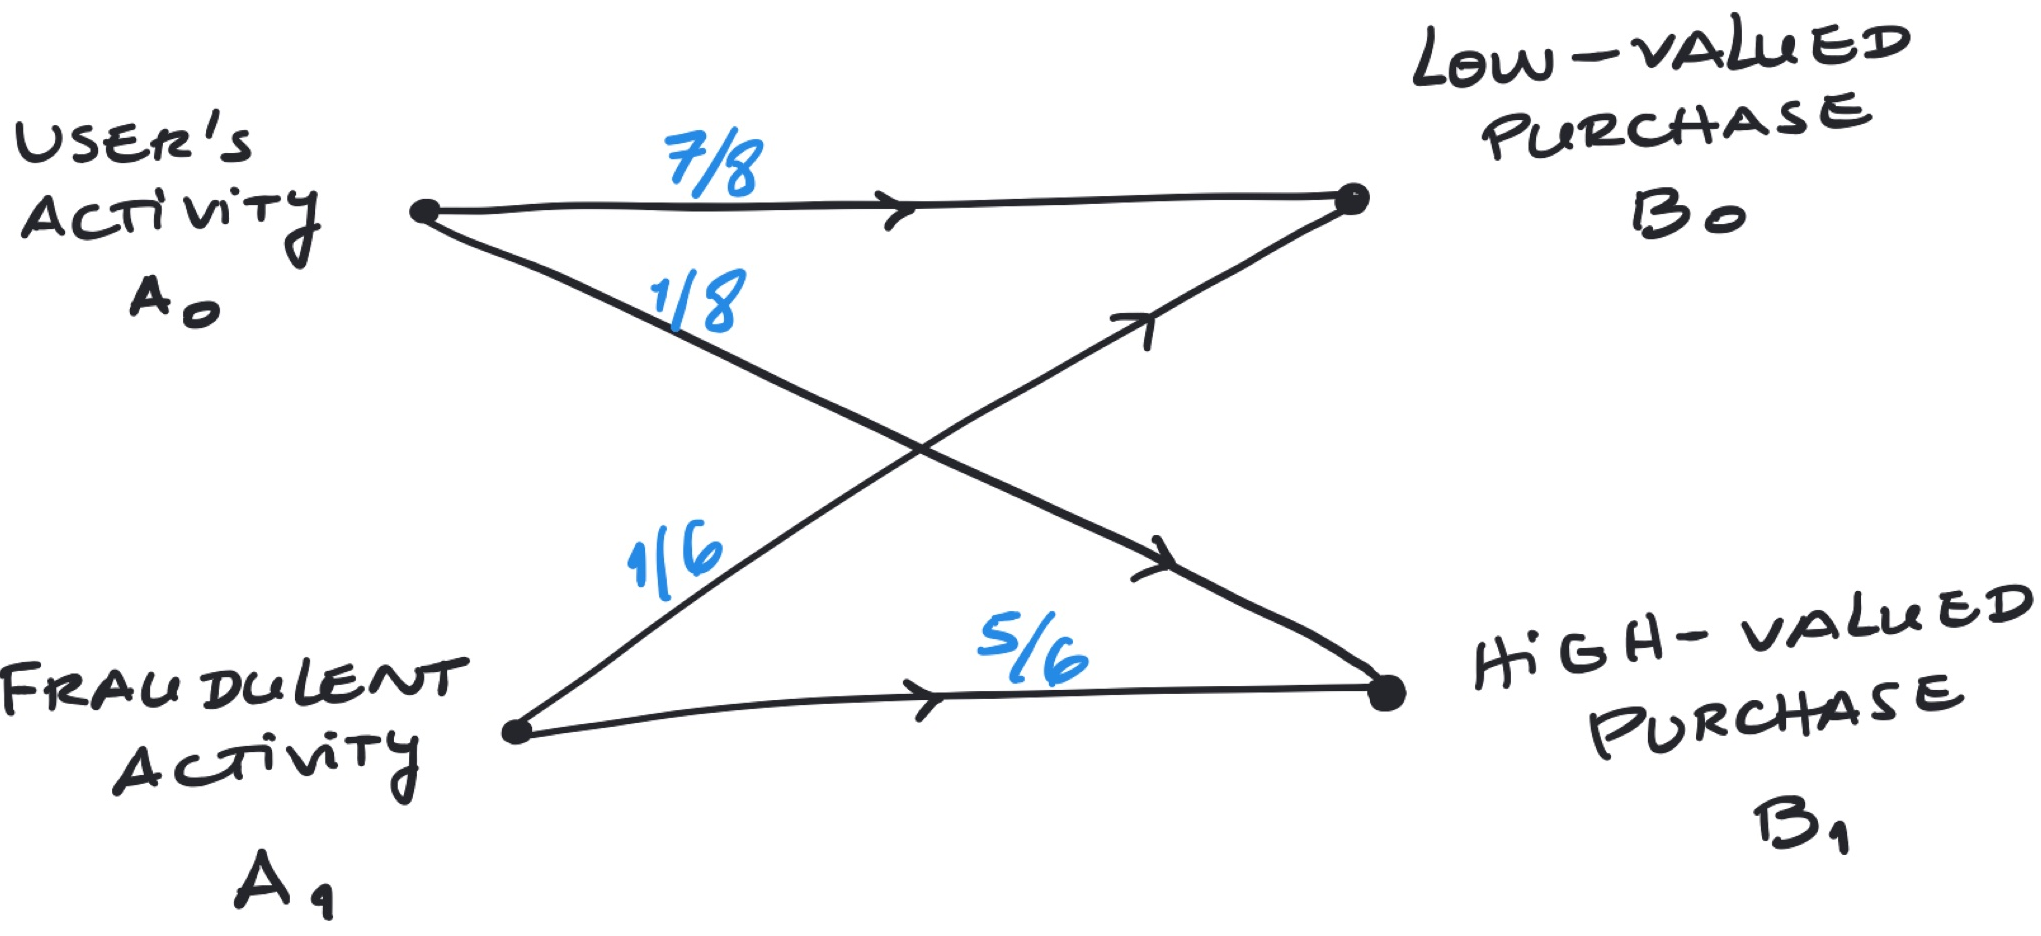

In [1]:
from IPython.display import Image
Image('figures/FraudDetection.png',width=700)

Consider the case that the user is a new credit card owner, so the bank will assume a prior $P(A_0) = \frac{9}{10}$.

The optimal decision rule is to decide $A_0$ when $B_0$ is received, and decide $A_1$ when $B_1$ is received.

Let's compute:

1. the MLE and MAP decision rules.

2. the probability of error.

Optimal decision rule: decide $A_0$ if $B_0$ and decide $A_1$ if $B_1$.

We are given: 

* Data likelihoods:
    * $P(B_0|A_0) = \frac{7}{8}$
    * $P(B_0|A_1) = \frac{1}{6}$
    * $P(B_1|A_0) = \frac{1}{8}$ 
    * $P(B_1|A_1) = \frac{5}{6}$ 
* Prior probabilities:
    * $P(A_0) = \frac{9}{10}$
    * $P(A_1) = \frac{1}{10}$
    
We can compute:

* $P(B_0) = P(B_0|A_0)P(A_0) + P(B_0|A_1)P(A|1) = \frac{7}{8}\times\frac{9}{10} + \frac{1}{6}\times\frac{1}{10} \approx 0.8042$

* $P(B_1) = P(B_1|A_0)P(A_0) + P(B_1|A_1)P(A|1) = \frac{1}{8}\times\frac{9}{10} + \frac{5}{6}\times\frac{1}{10} = 1 - P(B_0) \approx 0.1958$
    
**MLE Decision Rule**

* When receiving $B_0$:

\begin{align*}
P(B_0|A_0) & \underset{A_1}{\overset{A_0}{\gtrless}} P(B_0|A_1)\\
\frac{7}{8} &> \frac{1}{6} \Rightarrow \text{Decide }A_0
\end{align*}

* When receiving $B_1$:

\begin{align*}
P(B_1|A_0) & \underset{A_1}{\overset{A_0}{\gtrless}} P(B_1|A_1)\\
\frac{1}{8} &< \frac{5}{6} \Rightarrow \text{Decide }A_1
\end{align*}

* Error for MLE:

\begin{align*}
P_{MLE}(E) &= P(E|B_0)P(B_0) + P(E|B_1)P(B_1)\\
&= \frac{1}{8}\times 0.8042 + \frac{1}{6}\times0.1958\\
&\approx 0.1332
\end{align*}

**MAP Decision Rule**

* When receiving $B_0$:

\begin{align*}
P(A_0|B_0) & \underset{A_1}{\overset{A_0}{\gtrless}} P(A_1|B_0)\\
\frac{P(B_0|A_0)P(A_0)}{P(B_0)} & \underset{A_1}{\overset{A_0}{\gtrless}} \frac{P(B_0|A_1)P(A_1)}{P(B_0)}\\
\frac{\frac{7}{8}\times\frac{9}{10}}{0.8042} & \underset{A_1}{\overset{A_0}{\gtrless}} \frac{\frac{1}{6}\times\frac{1}{10}}{0.8042}\\
0.979 &> 0.021 \Rightarrow \text{Decide }A_0 
\end{align*}

* When receiving $B_1$:

\begin{align*}
P(A_0|B_1) & \underset{A_1}{\overset{A_0}{\gtrless}} P(A_1|B_1)\\
\frac{P(B_1|A_0)P(A_0)}{P(B_1)} & \underset{A_1}{\overset{A_0}{\gtrless}} \frac{P(B_1|A_1)P(A_1)}{P(B_1)}\\
\frac{\frac{1}{8}\times\frac{9}{10}}{0.1958} & \underset{A_1}{\overset{A_0}{\gtrless}} \frac{\frac{5}{6}\times\frac{9}{10}}{0.1958}\\
0.575 &> 0.425 \Rightarrow \text{Decide }A_0 
\end{align*}

* Error for MAP:

\begin{align*}
P_{MAP}(E) &= P(E|B_0)P(B_0) + P(E|B_1)P(B_1)\\
&= 0.021\times 0.8042 + 0.575 \times 0.1958\\
&\approx 0.1295
\end{align*}

## Bayes' Theorem

The prior probability of fraudulent activity, $p$, can change over time. For what set of values for $p$ will the MAP decision always decide $A_0$ when $B_0$ is received, and always decide $A_1$ when $B_1$ is received?

Let $p=P(A_1)$. 

* MAP decides $A_0$ when $B_0$ is received if

\begin{align*}
P(A_0|B_0) & > P(A_1|B_0)\\
\frac{P(B_0|A_0)P(A_0)}{P(B_0)} & > \frac{P(B_0|A_1)P(A_1)}{P(B_0)}\\
P(B_0|A_0)P(A_0) & > P(B_0|A_1)P(A_1)\\
\frac{7}{8}\times (1-p) & > \frac{1}{6}\times p\\
p & < 0.84
\end{align*}

* MAP decides $A_1$ when $B_1$ is received if

\begin{align*}
P(A_0|B_1) & < P(A_1|B_1)\\
\frac{P(B_1|A_0)P(A_0)}{P(B_1)} & > \frac{P(B_1|A_1)P(A_1)}{P(B_1)}\\
P(B_1|A_0)P(A_0) & > P(B_1|A_1)P(A_1)\\
\frac{1}{8}\times (1-p) & > \frac{5}{6}\times p\\
p & > 0.114
\end{align*}

* Therefore,

$$ 0.114 < P(A_1) < 0.84$$

# Introduction to Random Variables

* **What is a random variable?**

<div class="alert alert-info">
    <b>Random Variable</b>
    
* A **random variable** (or **RV**) is a *numeric* occurrence that is random.

*Formal definition:* Given an experiment and the corresponding set of possible outcomes (the sample space), a **random variable** associates a particular *number* with each outcome (see figure below). We refer to this number as the **numerical value** or simply the **value** of the RV. Mathematically, a **random variable is a real-valued function of the experimental outcome**.
</div>

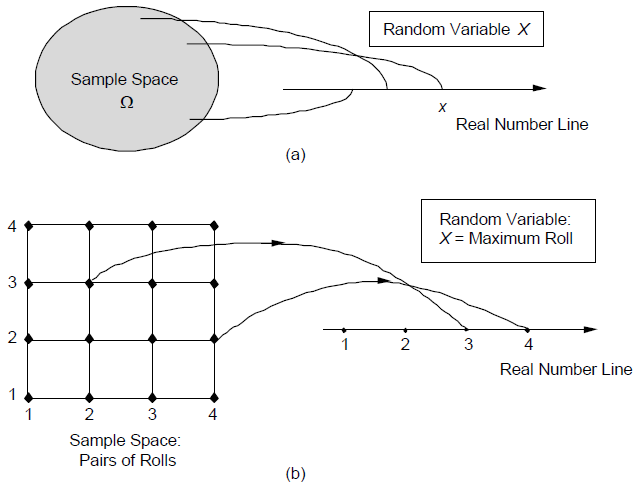

In [2]:
from IPython.display import Image
Image('figures/RV.png',width=800)

* As mentioned above, we define a random variable on a probability space $(\Omega,\mathcal{F},P)$ as a **function** from the sample space $\Omega$ to the real line $\mathbb{R}$.

**<font color=blue>Example 1</font> Let's create a binary RV from tossing a fair coin.**

The sample space is $S=\{H,T\}$, we can represent H with value 1 in the real line and T with value 0 in the real line. Then we can define the random variable $X$ that is going to represent the outcomes of the experiment "tossing a fair coin": 
$$X(x) = \begin{cases}1, & x=H \\0, & x=T\end{cases}$$

**<font color=blue>Example 2</font> Let's create a binary RV from tossing a fair coin twice.**

The sample space is $S=\{HH,HT,TH,TT\}$.  We want the RV $Y$ to be binary so the only real value it can take are 0 or 1. Let's consider the case where we **map** the events $\{HH,HT,TH\}$ to 1 and the event $\{TT\}$ to 0. Then we can define the random variable $Y$ as: 
$$Y(y) = \begin{cases}1, & y=\{HH,HT,TH\} \\0, & y=\{TT\}\end{cases}$$

**<font color=blue>Example 3</font> Let's create another RV from tossing a fair coin twice.**

The sample space is $S=\{HH,HT,TH,TT\}$. Here we are not told $Z$ can only be binary, then we can **map** each possible event to a different real-value number. So, we can define the random variable $Z$ as: 
$$Z(z) = \begin{cases}1, & z=\{HH\} \\2, & z=\{HT\}\\3, & z=\{TH\}\\4, & z=\{TT\}\end{cases}$$

A **function of a random variable** defines another random variable. This is the case of RVs $Y$ and $Z$ above.

* We can associate with each RV certain "averages" of interest, suh as the **mean** and the **variance**.

* A random variable can be **conditioned** on an event or on another random variable.
    * For example, consider the random variable $X$ of rolling a die. We can build a second RV that takes the outcome of $X$ as the number of times we will flip a coin.
    * Another example, consider the RVs $X$ and $Z$ defined above. Are $X$ and $Z$ **independent**?
        <!-- * No! If $y=0$, then x=\{TT\}.-->

* There is a notion of **independence** of a random variable from an event or from another random variable.

# Discrete Random Variables

<div class="alert alert-info">
    <b>Discrete Random Variable</b>
    
A random variable is called **discrete** if its range (the set of values that it can take) is either **finite** or **countably infinite**.

* A discrete RV has an associate **probability mass function (PMF)**, which gives the probability of each numerical value that the random variable can take.

* A **function of a discrete random variable** defines another discrete random variable, whose PMF can be obtained from the PMF of the original random variable.
</div>

## Probability Mass Functions (PMFs)

The most important way to characterize an RV is through the probabilities of the values that it can take. For a discrete RV $X$, these are captured by a **probability mass function (PMF)** of $X$, denoted by $p_X$.

* In particular, if $x$ is any real number, the **probability mass** of $x$, denoted $p_X(x)$, is the probability of the event $\{X=x\}$ consisting of all outcomes that give rise to a value $X$ equal to $x$:

$$p_X(x) = P(\{X=x\})$$

* Note that 

$$\sum_x p_X(x) = 1$$

as $x$ ranges over al possible values of $X$, the events $\{X=x\}$ are **disjoint** and form a partition of the sample space.

* By a similar argument, for any set $S$ of possible values of $X$ we have

$$P(X\in S) = \sum_{x\in S} p_X(x)$$

### Calculation of the PMF of a Random Variable $X$

For each possible value $x$ of $X$:

1. Collect all the possible outcomes that give rise to the event $\{X=x\}$.

2. Add their probabilities to obtain $p_X(x)$.

**<font color=blue>Example 4</font> Let's create the PMF for the binary RV from tossing a fair coin.**

$$p_X(x) = P(X=x) = \begin{cases}\frac{1}{2}, & x=1 \\ \frac{1}{2}, & x=0 \\ 0, & \text{otherwise} \end{cases}$$

**<font color=blue>Example 5</font> Let's create the PMF of the binary RV from tossing a fair coin twice.**

$$p_Y(y) = P(Y=y) = \begin{cases}\frac{3}{4}, & y=1 \\ \frac{1}{4}, & y=0 \\ 0, & \text{o.w.} \end{cases}$$

**<font color=blue>Example 6</font> Let's create the PMF for the RV from tossing a fair coin twice.**

$$p_Z(z) = P(Z=z) = \begin{cases}\frac{1}{4}, & z=0,1,2,3 \\ 0, & \text{o.w.} \end{cases}$$

**<font color=blue>Example 7</font> Consider the experiment "roll a fair 6-sided die". Let the RV $X$ be the real-value function of the outcomes of this experiment, respectively $X=\{1,2,3,4,5,6\}$ or $X\equiv$ # on top face. Let's create the PMF of RV $X$.**

$$p_X(x) = P(X=x) = \begin{cases}\frac{1}{6}, & x=1,2,\dots,6 \\ 0, & \text{o.w.} \end{cases}$$

**<font color=blue>Example 8</font> Consider the experiment "flip a fair coin until heads occurs". Let the RV $X$ be the # on flips. Let's create the PMF of RV $X$.**

$$p_X(x) = \begin{cases}\left(\frac{1}{2}\right)^x, & x=1,2,\dots \\ 0, & \text{o.w.} \end{cases}$$

## Cumulative Distribution Function (CDF)

<div class="alert alert-info">
    <b>Cumulative Distribution Function</b>
    
If $(\Omega,\mathcal{F},P)$ is a probability space with $X$ a real discrete RV on $\Omega$, the **Cumulative Distribution Function (CDF)** is denoted as $F_X(x)$ and provides the probability $P(X\leq x)$. In particular, for every $x$ we have

$$F_X(x) = P(X\leq x) = \sum_{k\leq x} p_X(k)$$

Loosely speaking, the CDF $F_X(x)$ "accumulates" probability "up to" the value $x$.
</div>

The CDF $F_X(x)$ is a **probability measure**. 
* Thus $F_X(x)$ inherits all the properties of a probability measure (axioms and corollaties still apply).

* The cumulative distribution function is also sometimes called the *probability distribution function (PDF)*, but I will avoid this terminology to avoid confusion with another function we will use called probability density function (pdf).

In [10]:
import random
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Arbitrary Discrete RVs in Python

The module ```stats``` from the library **SciPy** (pronounced "Sigh Pie") contains a large number of probability distributions as well as a growing library of statistical functions.

* ```scipy```'s API: https://docs.scipy.org/doc/scipy/reference/stats.html

* If you install Python 3+ through [Anaconda](https://www.anaconda.com/distribution/) then you already have installed the library ```scipy```.

In [11]:
import scipy.stats as stats

**<font color=blue>Example 9</font> Let's implement the RV in example 5:**

In [12]:
# Experiment flipping a fair coin twice
# Binary RV Y

vals = [0,1]
probs = [1/4, 3/4]

In [13]:
Y = stats.rv_discrete(values=(vals, probs))

Y

Now, we can compute and plot the **PMF** by calling different methods over the random variable $Y$:

In [14]:
?stats.rv_discrete

In [15]:
Y.pmf(vals)

array([0.25, 0.75])

What is the PMF at point $x=2$, i.e., $p_Y(2)$?

In [16]:
Y.pmf(2)

0.0

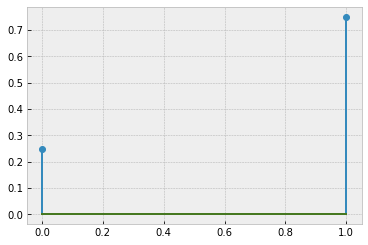

In [17]:
plt.stem(vals, Y.pmf(vals));

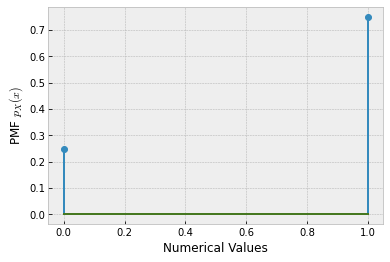

In [18]:
plt.stem(vals, Y.pmf(vals))
plt.xlabel('Numerical Values')
plt.ylabel('PMF $p_X(x)$');

We can also *sample* random numbers from the random variable $Y$.

* You can think of the RV $Y$ as a function that will reproduce certain numerical values over a probabilistic model.

In [19]:
sample = Y.rvs(size=20)

sample

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

* What is the probability of outcome $1$?

In [20]:
np.sum(sample==1)/len(sample)

0.85

* When we sample from a probabilistic model, the relative frequency of events should approach the true probabilistic model as we sample more data:

In [21]:
N=100_000

np.sum(Y.rvs(size=N)==1)/N

0.74817

**<font color=blue>Example 10</font> Let's implement the RV in example 6:**

In [22]:
# tossing a fair coin twice 
# Z not binary 

vals2 = [1,2,3,4]
probs2 = [1/4]*4

In [23]:
Z = stats.rv_discrete(values=(vals2, probs2))

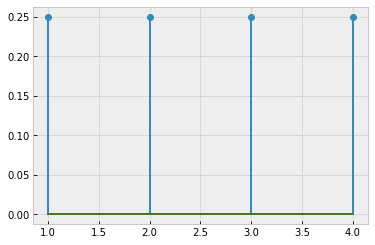

In [24]:
plt.stem(vals2, Z.pmf(vals2));

In [25]:
sample = Z.rvs(size=20)

sample

array([2, 4, 3, 2, 1, 2, 3, 3, 4, 2, 4, 4, 2, 3, 1, 3, 3, 2, 2, 3])

In [26]:
np.sum(sample==1)/len(sample)

0.1

In [27]:
N = 100_000

np.sum(Z.rvs(size=N)==1)/N

0.25171

## Plotting CDF

**<font color=blue>Example 11</font> Let's compute and plot the CDF of RV $Y$:**

Let's first define some range of values $y$:

In [28]:
y = np.linspace(-1, 2, 100)
y

array([-1.        , -0.96969697, -0.93939394, -0.90909091, -0.87878788,
       -0.84848485, -0.81818182, -0.78787879, -0.75757576, -0.72727273,
       -0.6969697 , -0.66666667, -0.63636364, -0.60606061, -0.57575758,
       -0.54545455, -0.51515152, -0.48484848, -0.45454545, -0.42424242,
       -0.39393939, -0.36363636, -0.33333333, -0.3030303 , -0.27272727,
       -0.24242424, -0.21212121, -0.18181818, -0.15151515, -0.12121212,
       -0.09090909, -0.06060606, -0.03030303,  0.        ,  0.03030303,
        0.06060606,  0.09090909,  0.12121212,  0.15151515,  0.18181818,
        0.21212121,  0.24242424,  0.27272727,  0.3030303 ,  0.33333333,
        0.36363636,  0.39393939,  0.42424242,  0.45454545,  0.48484848,
        0.51515152,  0.54545455,  0.57575758,  0.60606061,  0.63636364,
        0.66666667,  0.6969697 ,  0.72727273,  0.75757576,  0.78787879,
        0.81818182,  0.84848485,  0.87878788,  0.90909091,  0.93939394,
        0.96969697,  1.        ,  1.03030303,  1.06060606,  1.09

And now, plot the CDF of $Y$ for the range of values in $y$:

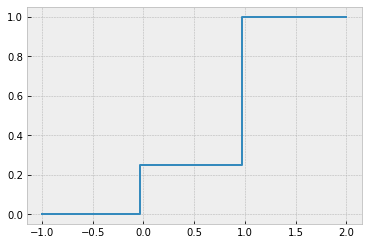

In [29]:
plt.step(y, Y.cdf(y));

**<font color=blue>Example 6 Part 3</font> Let's compute and plot the CDF of RV $Z$:**

* What range of values should we create now, to fully visualize the CDF?

In [30]:
z = np.linspace(0, 5, 100)

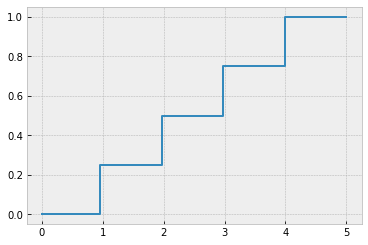

In [31]:
plt.step(z, Z.cdf(z));

# Important Discrete RVs

## The Bernoulli Random Variable

An event $A\in\mathcal{F}$ is considered a "success".

* A **Bernoulli RV** $X$ is defined by

$$X(x) = \begin{cases}1, & x\in A \\ 0,& x\notin A \end{cases}$$

* The PMF for a Bernoulli RV $X$ is defined by

$$p_X(x) = P(X=x) = \begin{cases}p,&x=1\\1-p,&x=0\\0,& \text{o.w.}  \end{cases}$$

* We have seen this PMF before when we considered *data likelihood* for a coin flip. Remember for the toss of a coin, which comes up heads with probability $p$, and a tail with probability $1-p$.

* We say that the "R.V. $X$ follows a Bernoulli distribution with parameter $p$" and we write this as:

$$X \sim \text{Bernoulli}(p) $$

* **Engineering examples/applications:** whether a bit is 0 or 1, whether a bit is in error, whether a component has failed, whether something has been detected.

In [27]:
?stats.bernoulli

In [28]:
B = stats.bernoulli(0.2)

In [30]:
b = range(-1,3) # -1, 0, 1, 2

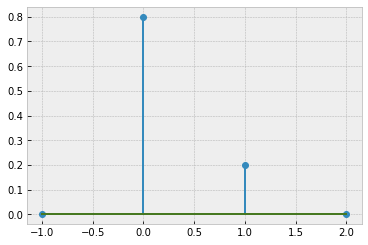

In [31]:
plt.stem(b, B.pmf(b));

In [52]:
x = np.linspace(-1,2,1000)

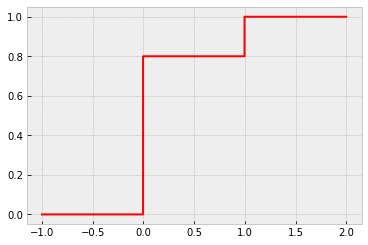

In [53]:
# plt.plot(x, B.cdf(x))
plt.step(x, B.cdf(x), 'r');

# We prefer to use the step() plotting function for plotting CDFs

In [37]:
N = 100_000

sample = B.rvs(size=N)

print('Probabiity of success (b=1) is ~', np.sum(sample==1)/N)

Probabiity of success (b=1) is ~ 0.19938


Let's now plot the histogram of this sample. Let's start by defining the bins of the histogram:

In [38]:
mybins = [0,1,2]

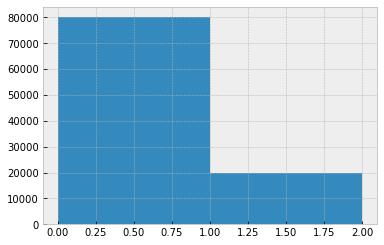

In [39]:
plt.hist(sample, bins=mybins);

We can plot the relative frequency of all the values in each bin, by changing the parameter ```density``` in the histogram function:

In [40]:
?plt.hist

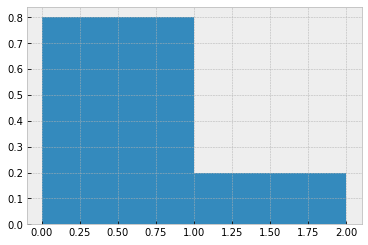

In [41]:
plt.hist(sample, bins=mybins, density= True);

# The Binomial Random Variable

* A Binomial RV represents the number of successes on $n$ independent Bernoulli trials.
    * Example: a coin is tossed $n$ times.

* Thus, a Binomial RV can also be defined as the sum of $n$ independent Bernoulli RVs.
    * Example: At each toss, the coin comes up heads with probability $p$ and a tail with probability $1-p$, independently of prior tosses.
    
* Let $X$ be the # of successes.
    * Example: X is the number of heads in the $n$-toss sequence.
    
* We refer to $X$ as the **Binomial** RV **with parameters $n$ and $p$**:

$$X \sim \text{Binomial}(n,p)$$

* The PMF of $X$ is given by

$$p_X(x) = P(X=x) = \begin{cases} \binom{n}{x} p^x (1-p)^{n-x}, & x=0,1,\dots,n \\ 0, & \text{o.w.} \end{cases} $$

* **Engineering examples/applications:** The number of bits in error in a packet, the number of defective items in a manufacturing run.

In [17]:
?stats.binom

In [18]:
Bn = stats.binom(12, 0.2)

Let's compute $P_X(2)$ where $X \sim \text{Binomial}(12,0.2)$:

In [19]:
from scipy.special import binom

In [21]:
# probability of 2 heads in 12 flips using a coin with 20% for flipping heads is

binom(12,2)*0.2**2*(1-0.2)**(12-2)

0.28346784153600024

Let's build a simulation, using NumPy arrays, to verify this result:

In [23]:
num_sims = 100_000

results = npr.choice([1,0], size=(num_sims, 12), p=[0.2, 0.8])
results

array([[0, 0, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
np.sum(results, axis=1)

array([2, 4, 3, ..., 3, 5, 0])

In [25]:
np.sum(np.sum(results, axis=1)==2)

28181

In [26]:
np.sum(np.sum(results, axis=1)==2)/num_sims

0.28181

The complete PMF of this Binomial RV is:

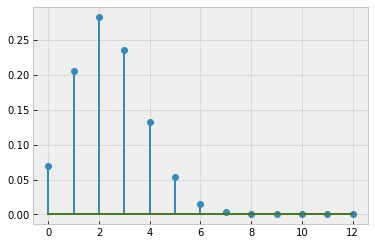

In [27]:
x = range(0,13)

plt.stem(x, Bn.pmf(x));

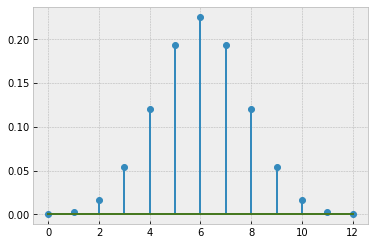

In [28]:
Bn2 = stats.binom(12, 0.5)

plt.stem(x, Bn2.pmf(x));

Let's plot its CDF:

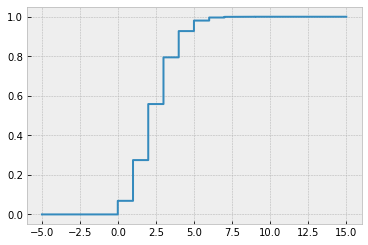

In [29]:
x = np.linspace(-5,15,1000)

plt.step(x, Bn.cdf(x));

Let's generate some samples (random variables) from this distribution and plot their PMF:

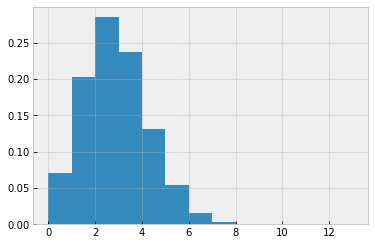

In [34]:
N = 100_000

sample = Bn.rvs(size=N)

mybins=range(0,14)

plt.hist(sample, bins=mybins, density=True);

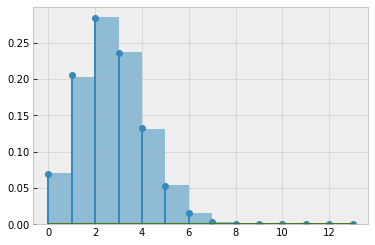

In [35]:
plt.hist(sample, bins=mybins, density=True, alpha=0.5)
plt.stem(mybins, Bn.pmf(mybins));

The plotting function ```hist``` can also plot the CDF of an RV:

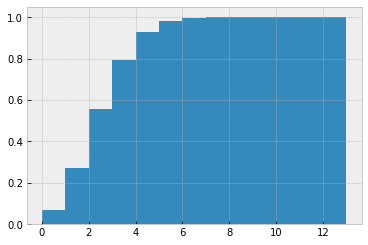

In [36]:
plt.hist(sample, bins=mybins, density=True, cumulative=True);

The histogram "fills" the area under the (CDF) curve. We can overlay the CDF curve on top:

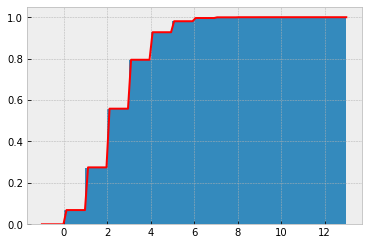

In [38]:
plt.hist(sample, bins=mybins, density=True, cumulative=True);

x = np.linspace(-1,13,100)
plt.plot(x, Bn.cdf(x), 'r');

But this plotting function does not look good. The probability seems to increase in between discrete values, which is not valid. Instead, we use the ```step``` plotting function:

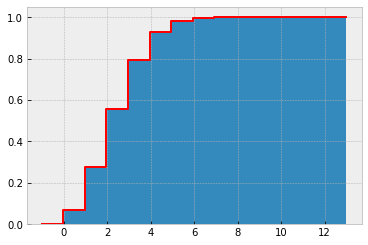

In [39]:
plt.hist(sample, bins=mybins, density=True, cumulative=True);

x = np.linspace(-1,13,100)
plt.step(x, Bn.cdf(x), 'r');

## Binomial as the Sum of Bernoulli RVs

The Binomial RV can also be defined as the sum of $n$ independent Bernoulli RVs.

In [41]:
B = stats.bernoulli(0.2)

# Bernoulli(p=0.2)

In [42]:
N = 100_000

samples = B.rvs(size=(N, 12)) # generates random values from Bernoulli RV

samples

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 1, 0]])

In [ ]:
Bsum = np.sum(samples, axis=1) # sums the columns, it gives the number of 1's per simulation
Bsum

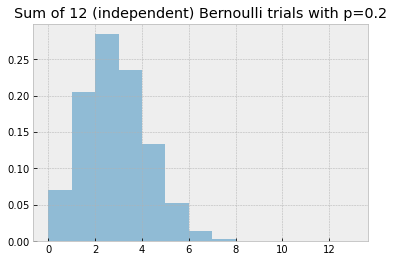

In [44]:
mybins=range(0,14)
plt.hist(Bsum, bins=mybins, density=True, alpha=0.5)
plt.title('Sum of 12 (independent) Bernoulli trials with p=0.2');

Let's overlay the true PMF function of a Binomial RV with parameters $n=12$ and $p=0.2$:

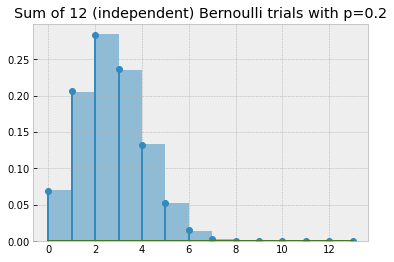

In [46]:
mybins=range(0,14)
plt.hist(Bsum, bins=mybins, density=True, alpha=0.5)
plt.title('Sum of 12 (independent) Bernoulli trials with p=0.2')

# Bn = stats.binom(12, 0.2)
plt.stem(mybins, Bn.pmf(mybins));

* **Conclusion:** Adding together independent Bernoulli RVs (with the same probability $p$) produces a Binomial RV.

# The Geometric Random Variable

* A Geometric RV occurs when independent Bernoulli trials are conducted until the first success
    * Example: repeatedly and independently toss a coin with probability of a heads equal to $p$, where $0<p<1$. 
    
* $X$ is the number of trials required.
    * Example: The Geometric RV is the number $X$ of tosses needed for a head to come up for the first time.

$$X \sim \text{Geometric}(p)$$

* The PMF of $X$ is given by

$$p_X(x) = P(X=x) = \begin{cases}p(1-p)^{x-1}, & x=1,2,\dots \\ 0, & \text{o.w.}\end{cases}$$

* **Engineering examples/applications:** The number of retransmissions required for a packet, number of white dots between black dots in the scan of a black and white document.

In [47]:
?stats.geom

In [2]:
G = stats.geom(0.2)

In [3]:
N=1000
sample = G.rvs(size=N)
# randomly sample 1000 points from Geometric(0.2)

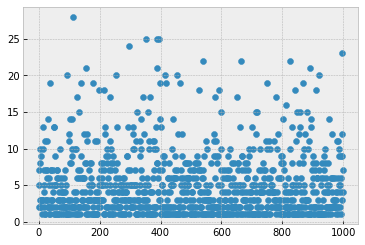

In [4]:
plt.scatter(range(len(sample)), sample);

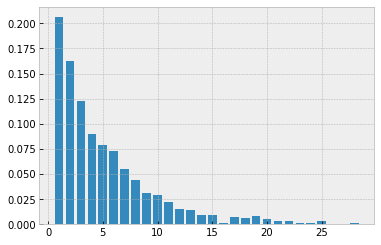

In [5]:
vals, counts = np.unique(sample, return_counts=True)
plt.bar(vals, counts/N);

* What is the probability that the first success occurs in the 1st trial (coin flip)?

$$p_X(1) = p(1-p)^{1-1} = p = 0.2$$

* 6th trial?

$$p_X(6) = p(1-p)^{6-1} = 0.2 \times 0.8^5 \approx 0.0655$$

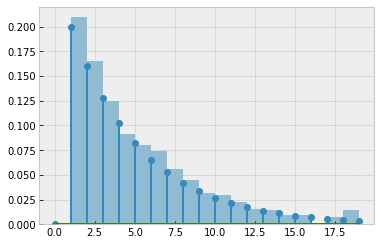

In [6]:
mybins = range(20)
plt.hist(sample, bins=mybins, density=True, alpha=0.5)
plt.stem(mybins, G.pmf(mybins));

* Let's visualize the PMF for the Geometric with parameter $p=0.5$?

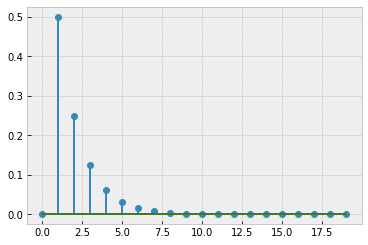

In [7]:
G2 = stats.geom(0.5)

plt.stem(mybins, G2.pmf(mybins));

* Let's visualize the PMF for the Geometric with parameter $p=0.8$?

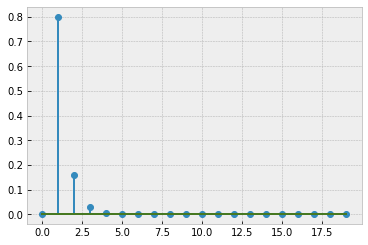

In [8]:
G3 = stats.geom(0.8)

plt.stem(mybins, G3.pmf(mybins));